<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/QuantumApplicationAlgorithm_VQA_QAOA(TSP4x4)_mkbahk_20260206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Python 3.9 ~ 3.11 환경에서 아래 순서대로 설치
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1
%pip install qiskit-algorithms==0.3.1
%pip install qiskit-optimization==0.7.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 16.1 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=30ea86fe2e6df15318caade2a6164ebdb1c8a8e03512a29e55104b6c084c32cb
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.4/647.4 kB 15.0 MB/s eta 0:00:00
  Installing build dependencies 

In [25]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit_algorithms import QAOA
from qiskit_algorithms.optimizers import COBYLA
from qiskit.primitives import Estimator, Sampler
# from qiskit.utils import algorithm_globals # This line is removed

from qiskit_optimization.applications import Tsp
from qiskit_optimization.converters import QuadraticProgramToQubo
from qiskit_optimization.algorithms import MinimumEigenOptimizer

In [26]:
# -----------------------------
# 1. 4x4 TSP distance matrix
# -----------------------------
distance_matrix = np.array([
    [0, 10, 15, 20],
    [10, 0, 35, 25],
    [15, 35, 0, 30],
    [20, 25, 30, 0]
])

num_cities = 4

In [27]:
# -----------------------------
# 2. TSP → QuadraticProgram
# -----------------------------
tsp = Tsp(distance_matrix)
qp = tsp.to_quadratic_program()

# QUBO 변환
qubo = QuadraticProgramToQubo().convert(qp)

In [28]:
# -----------------------------
# 3. QAOA 설정
# -----------------------------
# algorithm_globals.random_seed = 42 # This line is replaced
np.random.seed(42) # Use numpy's random seed for reproducibility

# Instantiate Sampler
sampler = Sampler()

history = []



def callback(eval_count, parameters, mean, std):
    print(eval_count,"\t", parameters,"\t", mean,"\t", std)
    history.append(mean)
###def

optimizer = COBYLA(maxiter=100)

qaoa = QAOA(
    sampler=sampler, # Pass the sampler as required
    optimizer=optimizer,
    reps=1,
    callback=callback
)

# MinimumEigenOptimizer로 QAOA 연결
meo = MinimumEigenOptimizer(qaoa)

평가횟수 	 파라메트들 	 중앙값 	 표준편자


/tmp/ipython-input-692665188.py:8: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


In [35]:
# -----------------------------
# 4. 최적화 실행
# -----------------------------
print("평가수\t", "파라메타들","\t\t\t\t\t", "중앙값","\t\t\t\t", "표준편자")
result = meo.solve(qubo)


평가수	 파라메타들 					 중앙값 				 표준편자
1 	 [-0.373880371929336, 1.194032507134505] 	 (248.82084842364443+0j) 	 {}
2 	 [0.626119628070664, 1.194032507134505] 	 (4205.830530668038+0j) 	 {}
3 	 [-0.373880371929336, 2.194032507134505] 	 (772.3293177664883+0j) 	 {}
4 	 [-1.365242090803865, 1.0628763317170293] 	 (-34.923442860667194+0j) 	 {}
5 	 [-1.7480953443806118, 0.139067159741724] 	 (108.83065941356756+0j) 	 {}
6 	 [-1.738032965128876, 1.3960834205071597] 	 (3.2284813072752803+0j) 	 {}
7 	 [-1.2819403186063323, 1.156074050298282] 	 (198.14154255914235+0j) 	 {}
8 	 [-1.5240846068531768, 0.8698243825035492] 	 (4.454708448904074+0j) 	 {}
9 	 [-1.2730686159319147, 1.101658422042719] 	 (346.00037750767774+0j) 	 {}
10 	 [-1.3846331359667097, 1.1089630691530046] 	 (9.606220853860261+0j) 	 {}
11 	 [-1.4461660868351653, 1.0041285073630493] 	 (0.3374121552114797+0j) 	 {}
12 	 [-1.3240582814617132, 1.0345233098662758] 	 (-587.3302760507245+0j) 	 {}
13 	 [-1.2628775981735534, 0.95542258931081] 	 (99.768178

In [36]:
# -----------------------------
# 5. 결과 해석
# -----------------------------
print("최적 비용:", result.fval)
print("최적 비트열:", result.x)

route = tsp.interpret(result.x)
print("최적 경로:", route)

최적 비용: 80.0
최적 비트열: [0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0.]
최적 경로: [3, 2, 0, 1]


/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


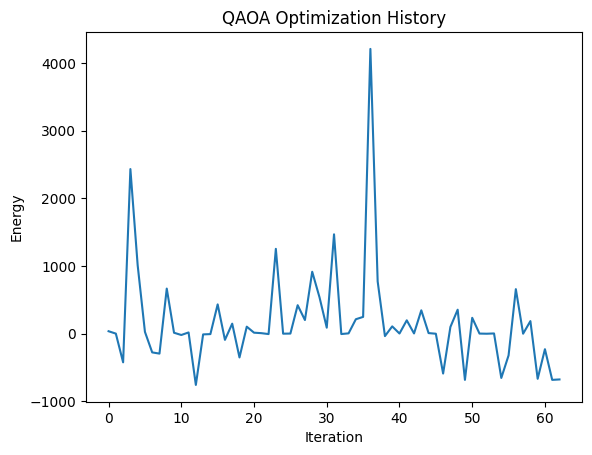

In [37]:
# -----------------------------
# 6. 최적화 과정 그래프
# -----------------------------
plt.figure()
plt.plot(history)
plt.xlabel("Iteration")
plt.ylabel("Energy")
plt.title("QAOA Optimization History")
plt.show()


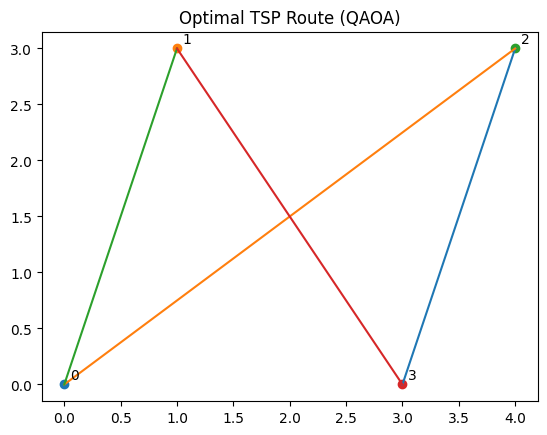

In [38]:
# -----------------------------
# 7. 최종 경로 시각화
# -----------------------------
# 도시 좌표 (시각화를 위한 임의 배치)
coordinates = {
    0: (0, 0),
    1: (1, 3),
    2: (4, 3),
    3: (3, 0)
}

plt.figure()

for city, (x, y) in coordinates.items():
    plt.scatter(x, y)
    plt.text(x + 0.05, y + 0.05, str(city))
###for

# 경로 그리기
for i in range(len(route)):
    start = coordinates[route[i]]
    end = coordinates[route[(i + 1) % len(route)]]
    plt.plot([start[0], end[0]], [start[1], end[1]])
###for

plt.title("Optimal TSP Route (QAOA)")
plt.show()